# Final Project
## Benjie Shaw

## Problem Framing and Big Picture

### The Business Problem

We want to be able to identify students who may need interventions early-- so they can perform maximally in courses prior to falling behind and needing intervention. If possible, we would like predict those students who may need additional help prior to any exams being taken in the course from provided demographic information about them and their families. Identifying student outcomes will increase the reputation of the school and provide better outcomes for our students.

### Framing the Problem

Since we are attempting to make predictions from data that have our target variable (the final course score), this is classified as a supervised learning task. We will attempt to create a model that predicts a student's final course score from a set of features (known variables) then compare the model prediction from the known final course score.

Because the data is complete and will not include new data inputs, this is an offline task.

### The Machine Learning Task

Since we are attempting to predict a final course grade from a set of features, this is a regression task. We will be attempting to predict a final number score based on a set of features and not simply classifying whether a student will pass the course or not. For this data set, regression allows us to arrive at a numeric prediction for a final grade based on a given set of features. If this were set up as a classification task, we would only be predicting whether a student met a specific benchmark or not (e.g., passing or failing).

### Model Metrics

Since we are building a regression model, the primary metrics we will use to evaluate the model are Root Mean-Squared Error (RMSE). Accuracy, and R-squared.

RMSE is the square root of the average of the absolute value of the differences between the predicted value and the observed value. A lower RMSE indicates better model performance.

The accuracy score is calcuated by dividing the correct number of predictions by the total number of predictions. This simple calculation gives us an indication of the overall effectiveness of the model.

R-squared is a measure that explains how much variance in the target variable (the final course grade) is predictable from independent variables.

## Miscellaneous Considerations

While machine learning processes are helpful in making predictions, algorithms are influenced by the nature of the data and assumptions of importance of some factors over others. Every effort is made to mitigate these influences, but machine learning projects should be weighed against other "soft", more human factors in a decision-making process.

## Relevant Imports

Below we will load all the relevant packages to complete the project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

## Get the Data

### Import the data

In [2]:
#Load the CSV file
data = pd.read_csv("student-mat.csv")

### Size and type of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

The dataset includes 395 rows reflecting 35 columns of information on 395 students. Several rows have null values ('age', 'absences_G1', 'absences_G2', and 'absences_G3') that we will have to determine how to approach.

The data has 3 data-types: 

- float64 is a number with a decimal 
- int64 is a number as an integer
- object is categorical data like "reason why school was chosen" and whether or not a student participates in after school activities with responses being either "Yes" or "No"

### Features and labels of the data

The columns in the dataset are the features for the model. Column names are pulled from the above section.

- **school**: The student's school ("GP" for Gabriel Pereira or "MS" for Mousinho da Silveira)
- **sex**: The student's sex ("F" for female or "M" for male)
- **age**: The student's age (numeric value ranging from 15 - 22)
- **address**: The student's home address ("U" for urban or "R" for rural)
- **famsize**: Family size ("LE3" = <= 3 or "GT3" >= 3)
- **Pstatus**: Parent's cohabitation status ("T" = living together, "A" = living apart)
- **Medu**: Mother's education level (0 = none, 1 = primary-4th grade, 2 = 5th-9th grade, 3 = secondary education, 4 = higher education)
- **Pedu**: Father's education level (0 = none, 1 = primary-4th grade, 2 = 5th-9th grade, 3 = secondary education, 4 = higher education)
- **Mjob**: Mother's job ("teacher", "health" care related, civil "services", "at_home" or "other")
- **Fjob**: Father's job ("teacher", "health" care related, civil "services", "at_home" or "other")
- **reason**: reason to choose their school (close to "home", school "reputation", "course" preference, "other")
- **guardian**: student's guardian ("mother", "father", or "other")
- **traveltime**: home to school travel time (1 = < 15 min, 2 = 15-30 min, 3 = 30 min - 1 hr, 4 = > 1 hr)
- **studytime**: weekly study time (1 = < 2 hrs, 2 = 2-5 hrs, 3 = 5-10 hrs, 4 = > 10 hrs)
- **failures**: number of past class failures (number ranging from 0-4)
- **schoolsup**: Did the student receive extra educational support (Yes or No)
- **famsup**: Did the student's family provide educational support (Yes or No)
- **paid**: Did the student take extra paid classes within the course subject? (Yes or No)
- **activities**: Did the student participate in extra-curricular activities? (Yes or No)
- **nursery**: Did the student attend nursery school? (Yes or No)
- **higher**: Does the student want to take higher education? (Yes or No)
- **internet**: Did the student have internet access at home? (Yes or No)
- **romantic**: Was the student in a romantic relationship? (Yes or No)
- **famrel**: The quality of the student's family relationships (1-5 range: 1 = very bad, 5 = excellent)
- **freetime**: Quantity of student's free time after school (1-5 range: 1 = very low, 5 = very high)
- **goout**: How often did student go out with friends? (1-5 range: 1 = very low, 5 = very high)
- **Dalc**: Student's workday alcohol consumption (1-5 range: 1 = very low, 5 = very high)
- **Walc**: Student's weekend alcohol consumption (1-5 range: 1 = very low, 5 = very high)
- **health**: Student's current health status (1-5 range: 1 = very bad, 5 = very good)
- **absences_G1**: number of school absences for G1 term (numeric value)
- **absences_G2**: number of school absences for G2 term (numeric value)
- **absences_G3**: number of school absences for G3 term (numeric value)
- **G1**: first term grade (numeric, ranging from 0-20)
- **G2**: second term grade (numeric, ranging from 0-20)

The data also includes a column titled "G3" which reflects the student's final grade on a range from 0-20. This is the column that we will attempt to predict from the list of above features. In machine learning verbiage, the final grade is called our model's "label".

### Split the Data into Training and Test Sets

The training set is a section of the data that we use to teach the computer how to make predictions. The test data is a section of the data set that is reserved to evaluate the effectiveness of our model after it has been trained by comparing the predicted values from the model against the known values in the data set.

Machine learning standards are for the training set to include 80% of the dataset and the test set to include the remaining 20%.

Since G3 is the label our model will predict, we need to drop G3 from the data set for training purposes. We will save it as it's own variable ("data_target") for the purposes of our data split.

In [4]:
#Save the G3 column as a separate series
data_target = data['G3']

#Drop the G3 column from the original dataset
data = data.drop(columns=['G3'])

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, data_target,
                                                   test_size=.2, random_state=42)

## Explore the Data

### Study the Training Set Attributes

We'll start by examining the descriptive statistics for the dataset.

In [5]:
#Descriptive statistics for the numerical columns
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000


The average student age is 16.7 years-old. This is somewhat surprising given the range of 15-22. The age column also has 11 missing values.

Medu (Mother's Education) and Fedu (Father's Education) are very similar. 

On average, students live less than 30 minutes from the school of their choice. In fact, 75% of students live within 30 minutes of the school of their choosing. 

Within the studytime column, 75% of the respondants studied for 5 hours or less per week.

Most students had not failed the course before in the training set.

Most students in the training set had very good to excellent family relationships (famrel). 

The mean of the goout column was very close to the middle of the range and is distributed along quartile values well. 

Dalc (daytime alcohol consumption) was low on average. Conversely, Walc (weekend alcohol consumption) had a mean value near the middle of the range and was distributed well along the quartile ranges.

More than half of the students in the training set rated their health as "very good" to "excellent". 

Absences in G1 and G2 were exactly the same suggesting a possible entry error, especially given the uptick of absences in the G3 column. Given the questionable nature of the G1 and G2 absences column, absences will not be utilized as a feature in the training set.

G1 and G2 represent the first and second term grades respectively. Since we want our model to predict the final course grade prior to the beginning of the course, neither column will be included in the model training set.

In [6]:
#Descriptive statistics for the categorical columns in the dataset

#Select the columns with object data types
categorical_data = X_train.select_dtypes(include='object').columns

#Descriptive statistics for categorical columns
X_train[categorical_data].describe(include='all')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,282,170,247,226,284,110,178,117,219,272,191,171,159,253,298,265,207


Gabriel Pereira students comprised the vast majority of the training set.

The sex of students is almost evenly distributed in the training set, with female students comprising a slight majority.

Urban students comprised the majority of the test set.

Most students have a family with more than 3 people.

While "other" was the most common job category for mother's and father's job, "other" comprised a significantly greater portion of responses in the father's job column compared to the mother's job column.

Mothers were significantly more likely to be listed as the guardian in the training set.

Most students in the training set did not receive school support.

A majority of students in the training set received familial support.

Slightly more than half of the students in the training set did not receive any type of additional paid support.

Right around 50% of students participated in extracurricular activities in the training set.

The vast majority of students in the training set attended nursery school.

An even greater majority of students in the training set expressed a desire to take higher education.

A majority of students had access to home internet.

A little more than 50% of students were not involved in a romantic relationship.

### Visualize the data

To begin exploring the potential significance of features on G3, we will plot select numerical features against G3 to gague their potential relationship.

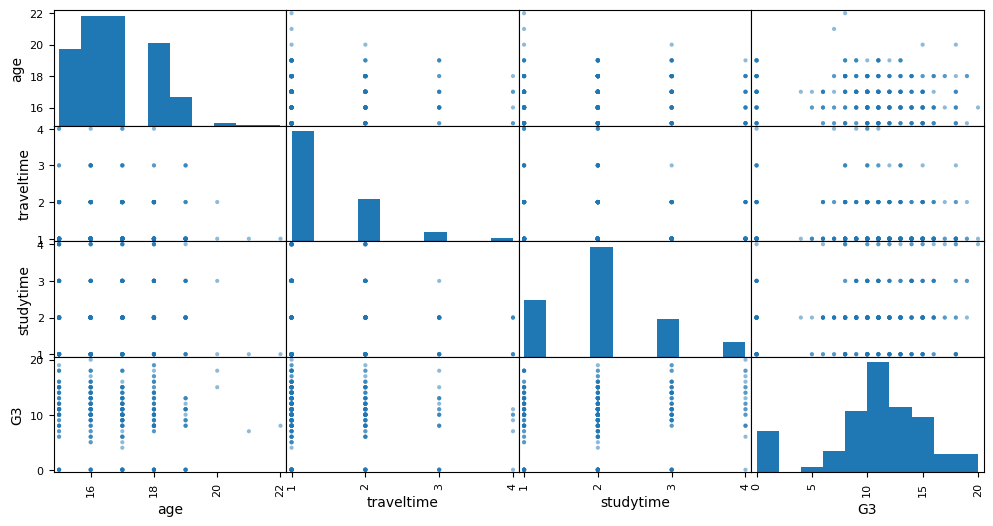

In [7]:
#select numeric values from the training data
data_attributes = ['age', 'traveltime', 'studytime']

#combine training features and target into DataFrame
test_df = pd.concat([X_train[data_attributes], y_train], axis=1)

#plot scatterplots and histograms to compare variables against self and target
scatter_matrix(test_df, figsize=(12,6))
plt.show()

**Age** -- Age does not appear to be a significant predictor of G3 score based on this graph. G3 scores vary almost evenly across most age categories. A possible exception is students who are older than 20 who appear to perform worse though there are comparitively few of them.

**Traveltime** -- Low travel times do not appear to be a significant predictor of G3 scores. Students who travel for 30 minutes or more appear to have fewer instances of failing grades (<10) as a proportion.

**Studytime** -- Similar to travel time, lower instances of study time have a high range in final grade scores. Students who spend 5+ hrs a week studying (a 3 or above in the chart) tend to have fewer instances of failing grades and potentially higher overall grades, but scores are still distributed relatively evenly across the grading spectrum.

### More plotting

We'll perform a similar visualization on three more numerical variables before exploring categorical variables.

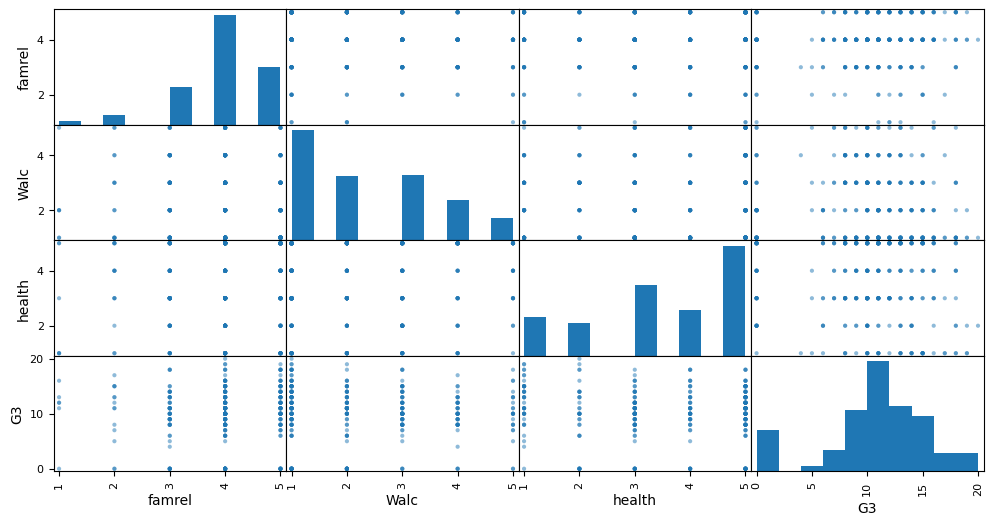

In [8]:
#select another set of numeric variables
data_attributes2 = ['famrel', 'Walc', 'health']

#combine training features and target into dataframe
test_df2 = pd.concat([X_train[data_attributes2], y_train], axis=1)

#plot scatterplots and histograms to compare values
scatter_matrix(test_df2, figsize=(12,6))
plt.show()

**famrel** -- While more students with higher quality family relationships did well in the course, the comparitively few students with poor family relationships appear to have all passed the course-- a distinction not shared by those with strong family relationships. 

**Walc** -- Students who drank more on weekends (indicated by a higher score)shared similar frequencies of failing with students who drank none to little. At the same time, students who drank more tend to not perform as well in the course at a high end compared to students who drank moderately (3) or not at all (1).

**health** -- Students with very good health (5) had a broad range of final grade distribution. The lines of all health levels appear to be relatively evenly distributed across all grade performances.

### Visualize Categorical Variables

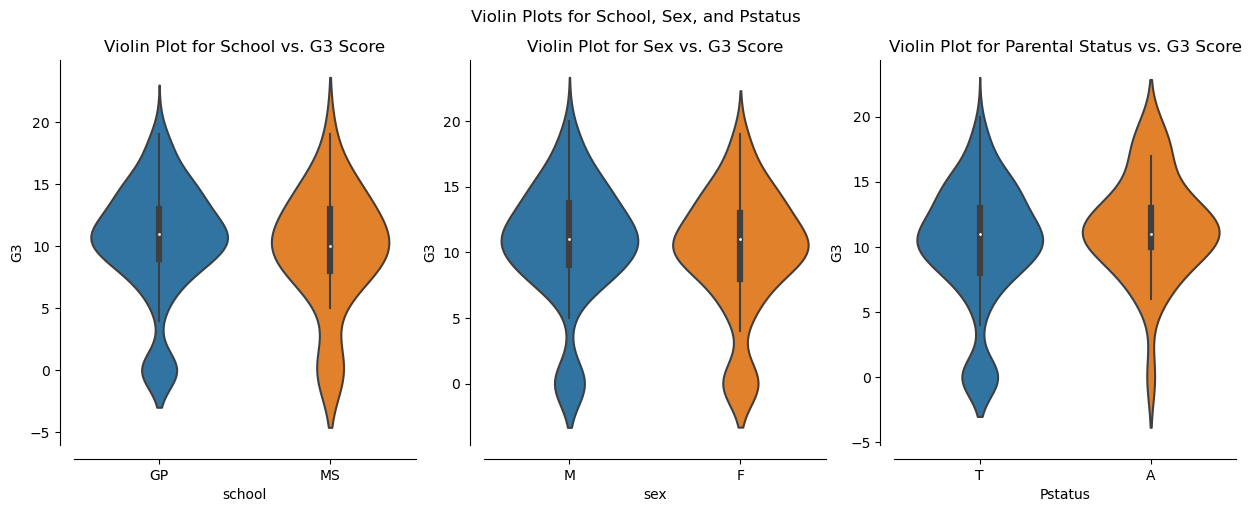

In [41]:
#Set up 1 row of 3 plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#Violin plot for school
sns.violinplot(x='school', y=y_train, data=X_train, ax=axes[0])
sns.despine(offset=10)
axes[0].set_title('Violin Plot for School vs. G3 Score')

#Violin plot for sex
sns.violinplot(x='sex', y=y_train, data=X_train, ax=axes[1])
sns.despine(offset=10)
axes[1].set_title('Violin Plot for Sex vs. G3 Score')

#Violin plot for parental status
sns.violinplot(x='Pstatus', y=y_train, data=X_train, ax=axes[2])
sns.despine(offset=10)
axes[2].set_title('Violin Plot for Parental Status vs. G3 Score')


plt.suptitle('Violin Plots for School, Sex, and Pstatus')
plt.show()

Let's look at the same visualizations as boxplots.

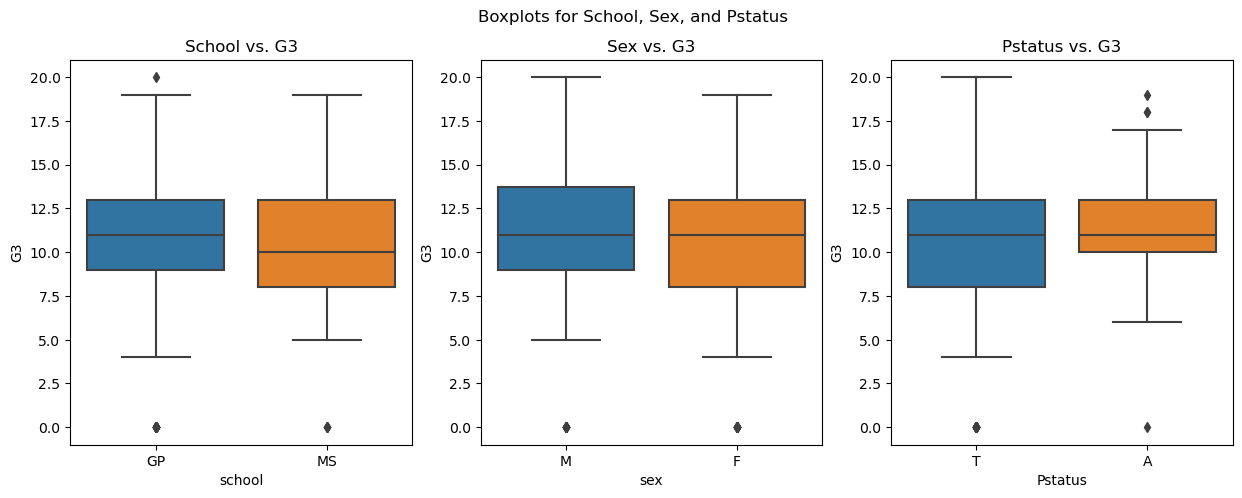

In [10]:
#Set up 1 row of 3 plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#Boxplot for school
sns.boxplot(x='school', y=y_train, data=X_train, ax=axes[0])
axes[0].set_title('School vs. G3')

#Boxplot for sex
sns.boxplot(x='sex', y=y_train, data=X_train, ax=axes[1])
axes[1].set_title('Sex vs. G3')

#Boxplot for Pstatus
sns.boxplot(x='Pstatus', y=y_train, data=X_train, ax=axes[2])
axes[2].set_title('Pstatus vs. G3')

plt.suptitle('Boxplots for School, Sex, and Pstatus')
plt.show()

The boxplots help identify a few broad trends. 

**School** -- GP has a slightly higher average score than MS and a higher 1st quantile score (students who score in higher than 25-50% of their peers), but their minimum score is lower compared to MS.

**Sex** -- The average grade for students is the same or very close regardless of their sex. Male students do have higher Q1 and Q3 ranges in their scores, higher overall scores, and a higher minimum score compared to female students.

**Pstatus** -- The average student score and the Q3 quantile are the same regardless of parental status (T = living together, A = living apart). Interestingly, students whose parents live apart have a higher Q1 range and a higher minimum score while students whose parents live together have lower Q1 and minimum scores while also having a higher maximum score.

### More boxplots

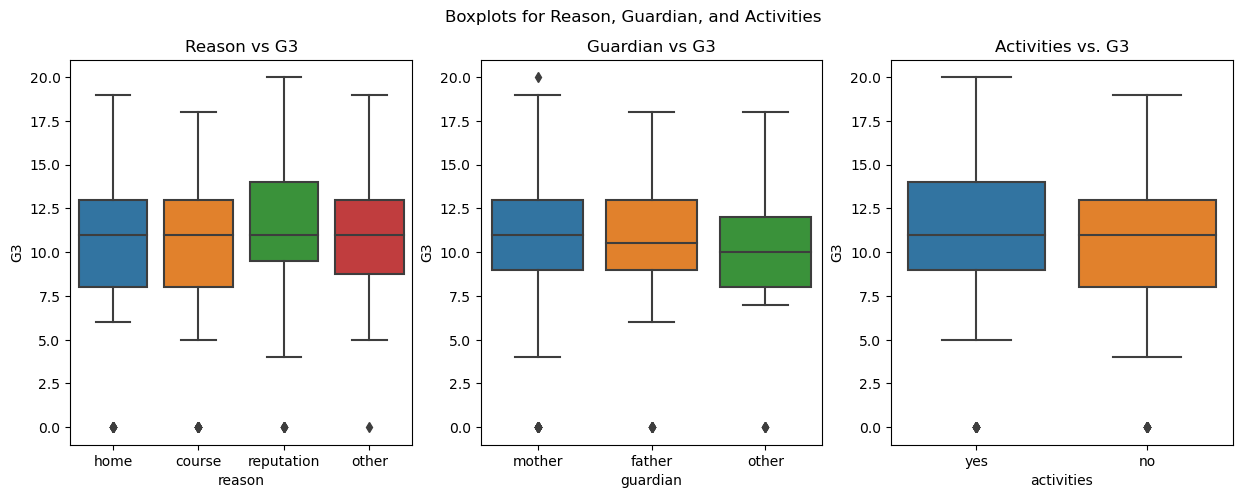

In [11]:
#Set up 1 row with 3 figures
fig, axes = plt.subplots (nrows=1, ncols=3, figsize=(15,5))

#Boxplot with reason
sns.boxplot(x='reason', y=y_train, data=X_train, ax=axes[0])
axes[0].set_title('Reason vs G3')

#Boxplot with guardian
sns.boxplot(x='guardian', y=y_train, data=X_train, ax=axes[1])
axes[1].set_title('Guardian vs G3')

#Boxplot with activities
sns.boxplot(x='activities', y=y_train, data=X_train, ax=axes[2])
axes[2].set_title('Activities vs. G3')

plt.suptitle('Boxplots for Reason, Guardian, and Activities')
plt.show()

**Reason** -- The average grade across all 4 reasons for taking the course appear to be close to if not equal. Home, Course, and Other all have very similar distributions of scores. The 'Reputation' response has higher maximum scores along with a higher interquartile range (values between 25-75% of scores) while also showing a lower minimum score.

**Guardian** -- Mother and father InterQuartile ranges were very similar with 'mother' showing a slightly higher average score and maximum compared to 'father'. 'Mother' also had the lowest minimum score across the 3 categories. 'Other' had a lower avearage and IQR scores compared to both 'mother' and 'father', but also had a higher minimum score and a maximum score that was similar to 'father'.

**Activities** -- The average score for both categories is similar, but 'yes' had greater maximum, minimum, and IQR score ranges compared to 'no'.

### More boxplots

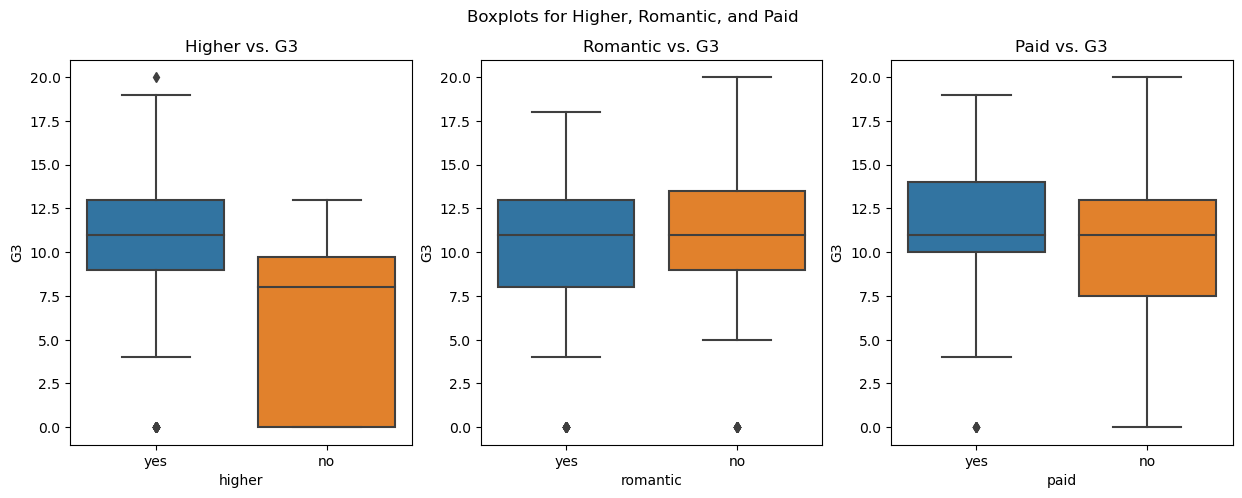

In [12]:
#Set up 1 row with 3 plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#higher
sns.boxplot(x='higher', y=y_train, data=X_train, ax=axes[0])
axes[0].set_title('Higher vs. G3')

#romantic
sns.boxplot(x='romantic', y=y_train, data=X_train, ax=axes[1])
axes[1].set_title('Romantic vs. G3')

#paid
sns.boxplot(x='paid', y=y_train, data=X_train, ax=axes[2])
axes[2].set_title('Paid vs. G3')

plt.suptitle('Boxplots for Higher, Romantic, and Paid')
plt.show()

**Higher** -- Students who aspired to higher education did better across the board compared to those who were not.

**Romantic** -- while median scores of students who were and were not involved in romantic relationships were similar, 'no' responses produced greater maximum and minimum scores and greater IQR scores thought the difference is slight.

**Paid** -- Students who were able to pay for additional resources performed better in terms of IQR and higher minimum scores. Interestingly, students who were not able to pay for additional resources achieved a higher maximum score.

### One last set of boxplots

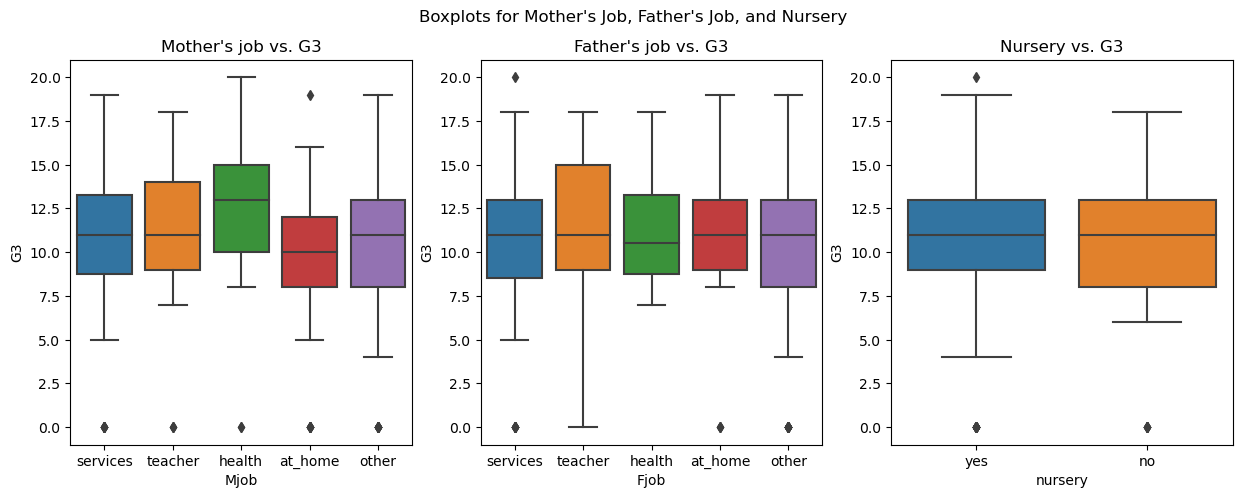

In [13]:
#Set up 1 row with 3 plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#Specifying the order of the Mjob and Fjob categories for the plots
category_order = ['services', 'teacher', 'health', 'at_home', 'other']

#Mjob
sns.boxplot(x='Mjob', y=y_train, data=X_train, order=category_order, ax=axes[0])
axes[0].set_title("Mother's job vs. G3")

#Fjob
sns.boxplot(x='Fjob', y=y_train, data=X_train, order=category_order, ax=axes[1])
axes[1].set_title("Father's job vs. G3")

#nursery
sns.boxplot(x='nursery', y=y_train, data=X_train, ax=axes[2])
axes[2].set_title('Nursery vs. G3')

plt.suptitle("Boxplots for Mother's Job, Father's Job, and Nursery")
plt.show()

**Mjob** -- A mother who works in 'health' reflects the highest scores of all values compared to other jobs. All mother job categories produced average scores at or above '10', but all except 'health' produced 1Q scores below '10'.

**Fjob** -- No one category produced significantly higher scores than the rest. The high score ranges were all relatively similar. 'Teacher' produced a higher 1Q score than its counterparts while also producing a significantly lower minimum score. Average scores were similar across all categories.

**Nursery**-- Students who attended nursery school had a higher IQR range compared to those who did not, including a higher maximum and lower minimum score. Average scores were similar across both groups.

### Correlation Matrix

In [14]:
#Select features to run correlation matrix

cor_attributes = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'Walc', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']

cor_df = pd.concat([X_train[cor_attributes], y_train], axis=1)
corr_matrix = cor_df.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3             1.000000
G2             0.907924
G1             0.791559
Medu           0.215968
studytime      0.138200
Fedu           0.135265
absences_G3    0.092245
famrel         0.069409
absences_G2    0.036652
absences_G1    0.036652
freetime      -0.015244
Walc          -0.057363
Dalc          -0.064698
health        -0.068857
goout         -0.106024
age           -0.134519
failures      -0.373769
Name: G3, dtype: float64

Outside of G2 and G1, none of the other features have strong correlations with G3. Among the remaining features, mother's education (Medu), study time, and father's education (Fedu) are the strongest positive indicators, meaning the higer the values in the data, the more likely the students are to score higher.

On the negative end of the correlation matrix, more past failures suggest a greater likelihood of doing poorly in the class. Higher ages and going out more often also suggest negative impacts on performance.

## Prepare the Data

### Create a function to select features of interest

In [15]:
def select_features(data):
    selected_columns = ['Medu', 'studytime', 'Fedu', 'failures', 'higher',
                        'paid', 'Mjob', 'G1', 'G2', 'absences_G1', 'absences_G2', 'absences_G3']
    #Select only the desired columns
    selected_data = data[selected_columns].copy()
    
    return selected_data

In [16]:
#Apply the function to the training data

X_train_features = select_features(X_train)

### Create absences transformer

We want to combine all the absence columns into one column called "total_absences." At the same time, we want to create an input feature that will allow us to drop the G1 and G2 grades from the model if we input "True."

In [17]:
class AbsenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1_G2=False):
        self.drop_G1_G2 = drop_G1_G2

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if 'G1' in X.columns and 'G2' in X.columns:
        # Create new column that sums the three absences columns
            X_transformed = X.copy()  # Create a copy to avoid modifying the input DataFrame
            X_transformed['total_absences'] = X_transformed[['absences_G1', 'absences_G2', 'absences_G3']].sum(axis=1)

        # Drop the original 3 absences columns in all instances
            X_transformed = X_transformed.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1)

        # If drop_G1_G2 = True, drop the specified columns
        if self.drop_G1_G2:
            X_transformed = X_transformed.drop(['G1', 'G2'], axis=1)

        return X_transformed

In [18]:
#Create 2 datasets: 1 with G1 & G2 and 1 without G1 & G2 by running the above transformer with True and False inputs
no_grades_train = AbsenceTransformer(drop_G1_G2=True)
grades_train = AbsenceTransformer(drop_G1_G2=False)

#Fit and transform both of the above results
X_train_no_grades_prepared = no_grades_train.fit_transform(X_train_features)
X_train_grades_prepared = grades_train.fit_transform(X_train_features)

### Create Pipelines for Data Preparation

In [19]:
# Create a pipeline to prepare numerical data -- fill or replace missing values
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # fills na values with the median value of the column
    StandardScaler())

# Create a pipeline to prepare categorical data -- fill or replace missing values
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),  # fills any missing values with the most frequent value of that column
    OneHotEncoder(drop='if_binary'))  # drops the first column if the value is binary-- reduces multicollinearity

## Create Column Transformer

Specify the lists of numeric and categorical attributes for the grades and no grades models.

In [20]:
#Specify features for grades training set
num_attributes_grades = ['total_absences', 'Medu', 'studytime', 'Fedu', 'failures', 'G1', 'G2']
cat_attributes_grades = ['higher', 'paid', 'Mjob']

#Specify features for no grades training set
num_attributes_no_grades = ['total_absences', 'Medu', 'studytime', 'Fedu', 'failures']
cat_attributes_no_grades = ['higher', 'paid', 'Mjob']

Now we can pass the numeric and categorical attributes of interest through the Column Transformer.

In [21]:
#Preprocess for the grades training set
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attributes_grades),
    ('cat', cat_pipeline, cat_attributes_grades)
])

#Preprocess for the no grades training set
preprocessing2 = ColumnTransformer([
    ('num', num_pipeline, num_attributes_no_grades),
    ('cat', cat_pipeline, cat_attributes_no_grades)
])

# Apply the transformations separately to each dataset
X_train_no_grades_prepared = preprocessing2.fit_transform(X_train_no_grades_prepared)
X_train_grades_prepared = preprocessing.fit_transform(X_train_grades_prepared)

### Check the shape of the transformed data sets

In [22]:
X_train_grades_prepared.shape

(316, 14)

In [23]:
X_train_no_grades_prepared.shape

(316, 12)

The transformer succesfully removed the G1 and G2 columns in the X_train_no_grades_prepared training model.

## Shortlist Promising Models

Since we are performing a regressinon task (predicting a final grade along a range of continuous values) with this data set, we will set up and evaluate the following models:

- Stochastic Gradient Descent
- Ridge Regression
- Lasso Regression
- Support Vector Machine with Polynomial Kernel

### Stochastic Gradient Descent

In [24]:
#set up the model for both the grades and no grades training data

sgd_model_grades = SGDRegressor(max_iter=10000, penalty=None, learning_rate='constant', n_iter_no_change=100, random_state=42)
sgd_model_no_grades = SGDRegressor(max_iter=10000, penalty=None, learning_rate='constant', n_iter_no_change=100, random_state=42)

### Perform Grid Search for SGD Models

In [25]:
#create dictionary of parameter values
sgd_param_grid = {'eta0': [.1, .01, .001],
                 'tol': [1e-1, 1e-3, 1e-5, 1e-7]}

#instantiate GridSearchCV() for each model
grid_search_cv_sgd_grades = GridSearchCV(sgd_model_grades,
                                        sgd_param_grid, verbose=1, cv=10)

grid_search_cv_sgd_no_grades = GridSearchCV(sgd_model_no_grades,
                                           sgd_param_grid, verbose=1, cv=10)

#fit the grid search models and print the best parameters
grid_search_cv_sgd_grades.fit(X_train_grades_prepared, y_train)
print('The best parameters for the grade set are:', grid_search_cv_sgd_grades.best_params_)

grid_search_cv_sgd_no_grades.fit(X_train_no_grades_prepared, y_train)
print('The best parameters for the no grade set are', grid_search_cv_sgd_no_grades.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
The best parameters for the grade set are: {'eta0': 0.001, 'tol': 0.001}
Fitting 10 folds for each of 12 candidates, totalling 120 fits
The best parameters for the no grade set are {'eta0': 0.001, 'tol': 1e-05}


In [26]:
#update the model to reflect the optimal parameters
sgd_model_grades = SGDRegressor(max_iter=10000, tol=.001, penalty=None, learning_rate='constant', 
                               n_iter_no_change=100, eta0=.001, random_state=42)
sgd_model_no_grades = SGDRegressor(max_iter=1000, tol=1e-05, penalty=None, learning_rate='constant',
                                  n_iter_no_change=100, eta0=.001, random_state=42)

### Ridge Regression

In [27]:
#Instantiate the Ridge model
ridge_model = Ridge(random_state=42)

### Perform Grid Search for Ridge Regression

In [28]:
#Create a dictionary of potential alpha values for Ridge regression
ridge_params = {'alpha': [0.25, 0.50, 0.75, 1, 2, 3, 5, 10, 100]}

#Instantiate grid search and set hyperparameters for both training sets
grid_search_CV_ridge_grades = GridSearchCV(ridge_model, ridge_params, verbose=1, cv=10)
grid_search_CV_ridge_no_grades = GridSearchCV(ridge_model, ridge_params, verbose=1, cv=10)

#Perform grid search for both models
grid_search_grades = grid_search_CV_ridge_grades.fit(X_train_grades_prepared, y_train)
grid_search_no_grades = grid_search_CV_ridge_grades.fit(X_train_no_grades_prepared, y_train)

#Fit the models and print the best hyperparameters
ridge_model_grades = grid_search_grades.best_estimator_
ridge_model_no_grades = grid_search_no_grades.best_estimator_

print('The best parameters for the grade set are', grid_search_grades.best_estimator_)
print('The best parameters for the no grade set are', grid_search_no_grades.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
The best parameters for the grade set are Ridge(alpha=100, random_state=42)
The best parameters for the no grade set are Ridge(alpha=100, random_state=42)


In [29]:
#Update the model to incorporate optimized hyperparameters
ridge_model_grades = Ridge(alpha=100, random_state=42)
ridge_model_no_grades = Ridge(alpha=100, random_state=42)

### Lasso Regression

In [30]:
#Instatiate the Lasso model
lasso_model = Lasso(max_iter=100000, alpha=0.1, tol=.001, random_state=42)

In [31]:
#Create dictionary of potential alpha and tol values for Lasso regression
lasso_params = {'alpha': [.1, .3, .5, 1],
               'tol': [1e-4, 1e-5, 1e-6]}

#Instantiate grid search and set hyperparameters for both training sets
grid_search_CV_lasso_grades = GridSearchCV(lasso_model, lasso_params, verbose=1, cv=10)
grid_search_CV_lasso_no_grades = GridSearchCV(lasso_model, lasso_params, verbose=1, cv=10)

#Perform grid search for both models
grid_search_grades_lasso = grid_search_CV_lasso_grades.fit(X_train_grades_prepared, y_train)
grid_search_no_grades_lasso = grid_search_CV_lasso_no_grades.fit(X_train_grades_prepared, y_train)

#Fit the model and find the best hyperparameters
lasso_model_grades = grid_search_grades_lasso.best_estimator_
lasso_model_no_grades = grid_search_no_grades_lasso.best_estimator_

print('The best parameters for the grades set are', lasso_model_grades)
print('The best parameters for the no grades set are', lasso_model_no_grades)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
The best parameters for the grades set are Lasso(alpha=0.1, max_iter=100000, random_state=42, tol=1e-06)
The best parameters for the no grades set are Lasso(alpha=0.1, max_iter=100000, random_state=42, tol=1e-06)


In [32]:
#Update the Lasso model with the optimal hyperparameters
lasso_model_grades = Lasso(max_iter=10000, alpha=.1, tol=1e-6, random_state=42)
lasso_model_no_grades = Lasso(max_iter=10000, alpha=.1, tol=1e-6, random_state=42)

### Support Vector Machine with Polynomial Kernels

In [33]:
#Instantiate the SVM model
svm = LinearSVR(max_iter=100000, epsilon=0.5, dual='auto', random_state=42)

In [34]:
#Create dictionary of potential epsilon values for SVM
svm_params = {'epsilon': [0, .5, 1],
             'tol': [1e-4, .001, .1],
             'C': [1, 5, 10]}

#Instantiate grid search and set hyperparameters for both training sets
grid_search_CV_svm_grades = GridSearchCV(svm, svm_params, verbose=1, cv=10)
grid_search_CV_svm_no_grades = GridSearchCV(svm, svm_params, verbose=1, cv=10)

#Perform grid search for both models
grid_search_svm_grades = grid_search_CV_svm_grades.fit(X_train_grades_prepared, y_train)
grid_search_svm_no_grades = grid_search_CV_svm_no_grades.fit(X_train_grades_prepared, y_train)

#Fit the model and find the best hyperparameters
svm_model_grades = grid_search_svm_grades.best_estimator_
svm_model_no_grades = grid_search_svm_no_grades.best_estimator_

print('The best parameters for the grades set are', svm_model_grades)
print('The best parameters for the no grades set are', svm_model_no_grades)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
The best parameters for the grades set are LinearSVR(C=5, dual='auto', epsilon=1, max_iter=100000, random_state=42,
          tol=0.1)
The best parameters for the no grades set are LinearSVR(C=5, dual='auto', epsilon=1, max_iter=100000, random_state=42,
          tol=0.1)


In [35]:
#Update the model with the optimal hyperparameters
svm_grades = LinearSVR(max_iter=10000, epsilon=1, dual='auto', C=5, tol=0.1, random_state=42)
svm_no_grades = LinearSVR(max_iter=10000, epsilon=1, dual='auto', C=5, tol=0.1, random_state=42)

### Model Metrics -- Compare Models

In [36]:
#Create a for loop to evaluate and print the RMSE of each model with and without grade information

#Create a list of models
grade_models = [svm_grades, lasso_model_grades, ridge_model_grades, sgd_model_grades]
no_grade_models = [svm_no_grades, lasso_model_no_grades, ridge_model_no_grades, sgd_model_no_grades]

#Define scoring metric as negative mean squared error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

#Set up loop for both lists
for model in grade_models:
    cross_val_scores = cross_val_score(model, X_train_grades_prepared, y_train, cv=5, scoring=scorer)
    rmse = np.sqrt(-cross_val_scores.mean()).round(3)
    print(f"Grades Model: {type(model).__name__}")
    print(f"Average RMSE across folds: {rmse}\n")
    
for model in no_grade_models:
    cross_val_scores = cross_val_score(model, X_train_no_grades_prepared, y_train, cv=5, scoring=scorer)
    rmse = np.sqrt(-cross_val_scores.mean()).round(3)
    print(f"No Grades Model: {type(model).__name__}")
    print(f"Average RMSE across folds: {rmse}\n")

Grades Model: LinearSVR
Average RMSE across folds: 1.95

Grades Model: Lasso
Average RMSE across folds: 1.876

Grades Model: Ridge
Average RMSE across folds: 2.135

Grades Model: SGDRegressor
Average RMSE across folds: 1.926

No Grades Model: LinearSVR
Average RMSE across folds: 4.455

No Grades Model: Lasso
Average RMSE across folds: 4.326

No Grades Model: Ridge
Average RMSE across folds: 4.276

No Grades Model: SGDRegressor
Average RMSE across folds: 4.393



### Interpret RMSE values to select a model

For our data with grade information, the Lasso model has the lowest RMSE score indiciating that it is likely the most accurate model.

For the data without grade information, the Lasso model has the second lowest RMSE score (Ridge is the lowest). But since the Lasso model score without grade information is nearer to the lowest than the Ridge model with grade information is, we will select the Lasso model.

## Fine-tune the System

In [37]:
#Perform one more grid-search on the Lasso model to identify any hyperparameters that can be tuned even more.

#Create dictionary of potential alpha and tol values for Lasso regression
lasso_params = {'alpha': [.001, .01, .1,],
               'tol': [1e-6, 1e-7, 1e-8]}

#Instantiate grid search and set hyperparameters for both training sets
grid_search_CV_lasso_grades = GridSearchCV(lasso_model, lasso_params, verbose=1, cv=10)
grid_search_CV_lasso_no_grades = GridSearchCV(lasso_model, lasso_params, verbose=1, cv=10)

#Perform grid search for both models
grid_search_grades_lasso = grid_search_CV_lasso_grades.fit(X_train_grades_prepared, y_train)
grid_search_no_grades_lasso = grid_search_CV_lasso_no_grades.fit(X_train_grades_prepared, y_train)

#Fit the model and find the best hyperparameters
lasso_model_grades = grid_search_grades_lasso.best_estimator_
lasso_model_no_grades = grid_search_no_grades_lasso.best_estimator_

print('The best parameters for the grades set are', lasso_model_grades)
print('The best parameters for the no grades set are', lasso_model_no_grades)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
The best parameters for the grades set are Lasso(alpha=0.1, max_iter=100000, random_state=42, tol=1e-08)
The best parameters for the no grades set are Lasso(alpha=0.1, max_iter=100000, random_state=42, tol=1e-08)


In [38]:
#Update the model with optimized hyper-parameters
lasso_model_grades = Lasso(max_iter=10000, alpha=.1, tol=1e-8, random_state=42)
lasso_model_no_grades = Lasso(max_iter=10000, alpha=.1, tol=1e-8, random_state=42)

### Transform test data

In [39]:
# Apply the feature selection function to the test data
X_test_features = select_features(X_test)

# Create 2 datasets: 1 with G1 & G2 and 1 without G1 & G2 by applying the grade transformer with True and False inputs
X_test_no_grades = AbsenceTransformer(drop_G1_G2=True)
X_test_grades = AbsenceTransformer(drop_G1_G2=False)

# Transform the data for both data sets
X_test_no_grades_prepared = X_test_no_grades.transform(X_test_features)
X_test_grades_prepared = X_test_grades.transform(X_test_features)

# Apply the transformations separately to each dataset
X_test_no_grades_prepared = preprocessing2.transform(X_test_no_grades_prepared)
X_test_grades_prepared = preprocessing.transform(X_test_grades_prepared)

### Make and Evaluate Predictions

In [40]:
#Shorten the code
final_grades = X_test_grades_prepared
final_no_grades = X_test_no_grades_prepared

#Make sure the model is fit to the training data
lasso_model_grades.fit(X_train_grades_prepared, y_train)
lasso_model_no_grades.fit(X_train_no_grades_prepared, y_train)

#Make predictions using both sets of data
final_grades_prediction = lasso_model_grades.predict(X_test_grades_prepared)
final_no_grades_prediction = lasso_model_no_grades.predict(X_test_no_grades_prepared)

#Evaluate the models' performance
grades_rmse = mean_squared_error(y_test, final_grades_prediction, squared=False).round(2)
no_grades_rmse = mean_squared_error(y_test, final_no_grades_prediction, squared=False).round(2)

print("The final RMSE for the grades data set:", grades_rmse)
print("The final RMSE for the no grades data set:", no_grades_rmse)

The final RMSE for the grades data set: 2.1
The final RMSE for the no grades data set: 4.35


## Conclusion

For this project, we attempted to build a machine learning model that could predict a student's final grade in a course based on a number of known factors. If possible, we wanted to be able to make those predictions before accounting for grades in exams in order to determine if a student may need additional assistance in the course prior to the course beginning. Doing so would allow us to allocate additional resources to students who may benefit from them more in order to achieve a more favorable outcome. 

After evaluating several models, we settled on the Lasso model as the one with the best predictive power for this data set based on its performance with our training data. We then applied the test data to the Lasso model.

Our model indicated that having the G1 and G2 test scores significantly aids our ability to predict a students' final grade in this course. The test data that included exam scores produced an RMSE of 2.1, meaning that the average error of our predictions was 2.1 points, a little more than 10% of the potential grade a student can receive in the course. Knowing the test scores allows us to narrow the scope of students who may benefit from additonal resources or academic interventions. Given that this course is graded on a 0-20 scale with 10 being passing, students who scored anywhere from 7-13 could increase their odds of passing the course with additional interventions.

Projections for the data set without the G1 and G2 test scores produced an RMSE of 4.35. While significantly higher than the model with test scores, this model is still useful for identifying which students may benefit most from additional resources since 4.35 points is based on a scale of 0-20 with 10 being a passing grade. Students whom the model predicts may score anywhere from a 6-15 would likely increase their odds of passing the course with additional resources or interventions.

Depending on the amount of additional resources or interventions available, the predictive model without grades allows us to positively impact the outcome of a larger number of students. If resources are somewhat limited, the model that takes exam scores into account allows us to impact a smaller number of students in a more focused manner.

### Evaluation of what worked and what didn't

Most items worked well in this project. Keying in hyperparameters allowed for a thorough analysis of all potential models before settling on the Lasso model. 

It would have been interesting to evaluate a third training set that considered the G1 score but dropped the G2 score to serve as a middle ground between broad and sweeping interventions from the no grades model and the small, limited interventions made possible by the model with both test grades. By the time 2 test grades are in, students have limited opportunity to improve their scores. However, if interventions were offered after the G1 exam, a more focused section of students may benefit.